In [41]:
#!/usr/bin/python

"""
    Starter code for the regression mini-project.
    
    Loads up/formats a modified version of the dataset
    (why modified?  we've removed some trouble points
    that you'll find yourself in the outliers mini-project).

    Draws a little scatterplot of the training/testing data

    You fill in the regression code where indicated:
"""    


import sys
import pickle
sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit
dictionary = pickle.load( open("../final_project/final_project_dataset_modified.pkl", "r") )


In [42]:
print dictionary["METTS MARK"]

{'salary': 365788, 'to_messages': 807, 'deferral_payments': 'NaN', 'total_payments': 1061827, 'exercised_stock_options': 'NaN', 'bonus': 600000, 'restricted_stock': 585062, 'shared_receipt_with_poi': 702, 'restricted_stock_deferred': 'NaN', 'total_stock_value': 585062, 'expenses': 94299, 'loan_advances': 'NaN', 'from_messages': 29, 'other': 1740, 'from_this_person_to_poi': 1, 'poi': False, 'director_fees': 'NaN', 'deferred_income': 'NaN', 'long_term_incentive': 'NaN', 'email_address': 'mark.metts@enron.com', 'from_poi_to_this_person': 38}


In [43]:
### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )


In [44]:
### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"



In [45]:
### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and 
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.
from time import time
from sklearn.linear_model import LinearRegression
t0 = time()
reg = LinearRegression()
reg.fit(feature_train, target_train)
t1 = time()
print "training time: %.2f s" % (t1-t0)
print "slope:\t", reg.coef_
print "intercept:\t", reg.intercept_

training time: 0.00 s
slope:	[ 5.44814029]
intercept:	-102360.543294


In [46]:
### score
print "score on training data:\t%.4f" % (reg.score(feature_train, target_train)*1.00)
print "score on test data:\t%.4f" %(reg.score(feature_test, target_test)*1.00)

score on training data:	0.0455
score on test data:	-1.4850


slope:	[ 2.27410114]
intercept:	124444.388866
score on training data:	-0.1236
score on test data:	0.2515


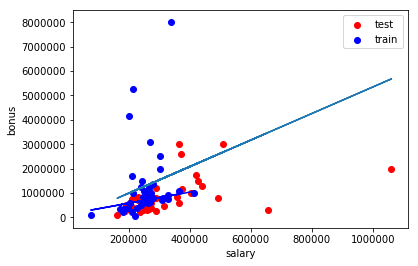

In [47]:
### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")




### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass

reg.fit(feature_test, target_test)
plt.plot(feature_train, reg.predict(feature_train), color="b")
print "slope:\t", reg.coef_
print "intercept:\t", reg.intercept_
print "score on training data:\t%.4f" % (reg.score(feature_train, target_train)*1.00)
print "score on test data:\t%.4f" %(reg.score(feature_test, target_test)*1.00)
plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()






training time: 0.00 s
slope:	[ 1.19214699]
intercept:	554478.756215
score on training data:	0.2171
score on test data:	-0.5927


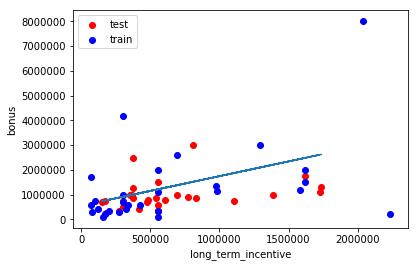

In [48]:
### list the features you want to look at--first item in the 
### list will be the "target" feature
features_list = ["bonus", "long_term_incentive"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )

### training-testing split needed in regression, just like classification
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"

### Your regression goes here!
### Please name it reg, so that the plotting code below picks it up and 
### plots it correctly. Don't forget to change the test_color above from "b" to
### "r" to differentiate training points from test points.
from time import time
from sklearn.linear_model import LinearRegression
t0 = time()
reg = LinearRegression()
reg.fit(feature_train, target_train)
t1 = time()
print "training time: %.2f s" % (t1-t0)
print "slope:\t", reg.coef_
print "intercept:\t", reg.intercept_

### score
### score on training data
print "score on training data:\t%.4f" % (reg.score(feature_train, target_train)*1.00)
print "score on test data:\t%.4f" %(reg.score(feature_test, target_test)*1.00)

### draw the scatterplot, with color-coded training and testing points
import matplotlib.pyplot as plt
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

### labels for the legend
plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")




### draw the regression line, once it's coded
try:
    plt.plot( feature_test, reg.predict(feature_test) )
except NameError:
    pass


plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()